<a href="https://colab.research.google.com/github/MarioBolanos/Modelado-y-Simulacion/blob/master/Eulers_method__1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Simple implementation of Euler's method
___



## Introduction

In all kinds of natural sciences, we encounter differential equations. These equations can be quite complicated to solve analytically, and most times there does not exist an analytical solution. Nonetheless, we still need solve these kinds of equations in order for them to better our understanding of whichever underlying physical system we are working with.

For many students, understanding how to solve ordinary differential equations, ODEs for short, can be a time consuming and frustrating process. The purpose of this notebook is to simply demonstrate __how__ an ODE can be solved. Will not focus on the theory behind Euler's method, we will solely focus on the __implementation__ of our ODE solver. Ideally, the reader should also understand the theory and possible pitfalls of using Euler's method, thus we strongly recommend also reading our other module on *[Euler's method](https://github.com/MarioBolanos/Metodo-de-Euler/blob/master/Eulers_method_Colab.ipynb)*  

 The most crude models for modeling bacterial growth is an excellent choice for demonstrating Euler's method, as the differential equation governing this growth is quite simple.

## Theory

### Population growth
Before we start programming, we will give a short introduction to bacterial growth. Bacteria reproduce by binary fission. This is a process where a single bacterial cell splits in two, creating two bacterial cells. The two new bacterial cells, can again split into two, thus creating four bacterial cells. In reality, a single bacterial cell can only split in two a certain amount of times, but in our project we model our growth rate as if this was not the case.

We can then write our differential equation as

\begin{equation}
\frac{dy}{dt} = ky(t),\tag{1}
\end{equation}

where $y(t)$ is the population $y$ at time $t$, and $k$ is some constant of proportionality. If we use days as time unit, and assume that the population size at $ t= 1$ is double the population size at the $t=0$

\begin{equation}
y(1) = 2y(0) \tag{2},
\end{equation}

we can solve the differential equation analytically. Combining equations $(1)$ and $(2)$, we get

\begin{equation}
y(t) = \mathrm{e}^{kt} = \mathrm{e}^{\mathrm{ln}(2)t} = 2^{t}. \tag{3}
\end{equation}

Equation $(3)$ fully describes the population size at time $t$.

### Euler's method
This paragraph will try to convey the bare minimum of theory regarding Euler's method. However, these paragraphs should be sufficient for the implementation.

First of all, when solving differential equations numerically, we need to __discretize__ our time variable $t$. $t$ is no longer a continuous variable, instead we write

$$
t_n = t_0 + nh, \quad \mathrm{with} \quad n = 0, 1, 2,..., N,
$$

where $t_0$ is the time value where we know our initial population size, and $h$ is the size between adjacent discrete time values. The relation between $N$ and $h$ is given by

$$
h = \frac{t_N - t_0}{N},
$$

where $N$ is the number of discrete time points we have in our simulation, while $t_N$ and denote the largest time value we have in our simulation.

In general, our numerical approximation will be better if we choose a small $h$. Note as the size of $h$ decreases, the number of discrete time values between $t_0$ and $t_N$ increases. We pay for the increased level precision by increasing the number of calculations needed, thus increasing the runtime of our program.

A first order differential equation with no explicit time dependence can be written on the the most general form

\begin{equation}
\frac{dy}{dt} = g(y),
\tag{4}
\end{equation}

where $g(y)$ is the equation governing the rate of change of our function $y(t)$. In our case, $g(y) = ky$.

If we know the population size at $t_0$ and denote this value as $y_0$, we can use Euler's method to find an approximation of the population size at $t_1 = t_0 +h$. The population size at $t_1$ is denoted as $y_1$. This approximation can be calculated by the formula

$$
y_1 = y_0 + hg(y_0).
$$

Now, to find the population size $y_2$ at $t_2 = t_1 + h = t_0 + 2h$, we use the same formula, but with $y_1$ instead of $y_0$

$$
y_2 = y_1 + h g(y_1).
$$

The most general form of Euler's method is written as

$$
y_{n+1} = y_n + h g(y_n),
\tag{5}
$$
where we have the initial condition that

$$
y(t_0) = y_0.
$$

Now we can implement Euler's method in Python, and compare our numerical results to the analytical solution given in equation $(3)$.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def step_euler(y,h,f):
  next_y=y+h*f(y)
  return next_y

def euler (h,f,y_0,start_t,end_t):
  N= int((end_t - start_t)/h)
  t_list=np.linspace(start_t,end_t,N+1)

  y_list=np.zeros(N+1)

  y_list[0]=y_0

  for i in range(0,N):
    y_list[i+1]=step_euler(y_list[i],h,f)

  return t_list,y_list

Now that we have our functions defined, we can simulate the bacterial population. We only need to define our RHS (Right hand side) of our differential equation, which we in the theory part denoted as $g(y)$.

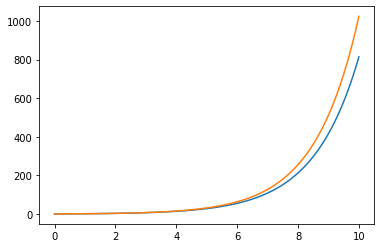

In [20]:
def g(y):
  crecimiento=np.log(2)*y
  return crecimiento


y_0=1
h=0.1
t_0=0
t_N=10

t_list,y_list=euler(h,g,y_0, t_0,t_N)
plt.plot(t_list,y_list)

plt.plot(t_list, np.power(2,t_list))


We see that our model fares quite well with a step size $h=0.0
1$, as it only deviates from the analytical solution by 24 bacteria cells, or 2.4 %. By choosing a smaller $h$, we could increase the precision of our result. For instance, choosing $h=0.001$, we would only get a deviation of 2.4 bacteria cells, or 0.24 %.

The reader might wonder why we would want to use Euler's method in this case, as we have a perfectly fine analytical solution. This differential equation has an analytical solution, however, this is not always the case. We only chose this example because can compare our numerical results to the correct answer, and thus validate our procedure. Changing our initial equation for the growth, equation $(5)$, to something called the logistic growth model on the form

\begin{equation}
\frac{dy}{dt} = ky(1 - \frac{y}{m}),
\tag{6}
\end{equation}

where $m$ is a constant, we cannot solve this equation analytically. However, we can still use Euler's method!

This plot illustrates perfectly the essence of Euler's method, and numerical solutions of ODEs in general. Even though we do not have an analytical solution to validate our results against, we can still extract important information from our numerical results and validate the results through physical arguments. The constant $m$ in $(6)$ is called the carrying capacity, the name manifests itself in our plot, as we observe that the population increases exponentially the first five days, but then it seems to converge towards 100 bacteria after 8 days. Physically, a possible explanation could be that our system only has the resources to maintain a population of 100 bacteria, and that additional bacteria would die.



## Conclusion
Even though Euler's method is very simple to implement, it is still a powerful tool for solving ODEs. In this notebook we have used Euler's method to solve the differential equation governing population growth in a bacterial colony, but the implementation can also be used to solve any ODE with no explicit time dependence. 

tarea

$$\dot{x}=sin(x)  \quad x_0=0,x_0=\pi/4, x_0=\pi/2$$